# Visualization Exercises

**Please do not share this material on any platform or by any other means.**

    We will be using the CVD data. 
    
    We used the Pandas library to answer the questions about cardiovascular disease (CVD) dataset to predict the presence or absence of CVD using the patient examination results. In this exercise set, we will create a few graphs to visually understand the data. 
    
    Data is given as a seperate file. 

    - Creating heatmap, violinplot, countplot
    - Interpretting these plots


---
**Data dictionary:**

There are 3 types of input features:

- *Objective*: factual information;
- *Examination*: results of medical examination;
- *Subjective*: information given by the patient.

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
---

---

In [1]:
# Import all required modules
import pandas as pd
import numpy as np

### Read the cardiovascular_data.csv as a dataframe 'df', find the shape of the dataframe and review first 4 records

In [5]:
# add your explanation and code here
df = pd.read_csv('cardiovascular_data.csv',delimiter=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [12]:
df['age_years'] = round(df['age']/365,0)

In [13]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,53.0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,62.0
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.0


### Throw out the bad data
We consider these as erroneous data:

- diastolic pressure is higher than systolic 
- height is strictly less than 2.5 percentile (Use `pd.Series.quantile` to compute this value. If you are not familiar with the function, please read the docs.)
- height is strictly more than 97.5 percentile
- weight is strictly less than 2.5 percentile
- weight is strictly more than 97.5 percentile

In [14]:
filtered_df = df[(df['ap_lo'] <= df['ap_hi']) & 
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) & 
                 (df['weight'] <= df['weight'].quantile(0.975))]
print('Filtered dataset: ',filtered_df.shape[0] / df.shape[0])

Filtered dataset:  0.9037


In [15]:
# assuming the filtered data set is named "filtered_df"
print('Remaining data: ',round((filtered_df.shape[0] / df.shape[0])*100,2), '%')

Remaining data:  90.37 %


In [16]:
print('Removed data: ',round(100-(filtered_df.shape[0] / df.shape[0])*100,2), '%')

Removed data:  9.63 %


# Visual data analysis

To understand the features better, you can create a matrix of the correlation coefficients between the features. Use the initial dataset (non-filtered).

Plot a correlation matrix using [`heatmap()`](http://seaborn.pydata.org/generated/seaborn.heatmap.html). You can create the matrix using the standard `pandas` tools with the default parameters.

In [17]:
import seaborn as sns
%matplotlib inline

In [19]:
dc = df.corr()
dc

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


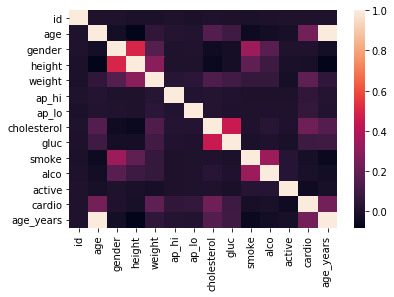

In [24]:
sns.heatmap(dc)

### Question 1: Create a violin plot for the height and gender

Violin plots show the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution. **Can you create a violin plot to show the distribution of height by gender?**

From our exploration of the unique values earlier, we know that the gender is encoded by the values *1* and *2*. We can figure out the mapping of the gender values graphically by looking at the mean values of height for each value of the *gender* feature as well!


Create a violin plot for the height and gender using [`violinplot()`](https://seaborn.pydata.org/generated/seaborn.violinplot.html). Use the parameter `hue` to split by gender.

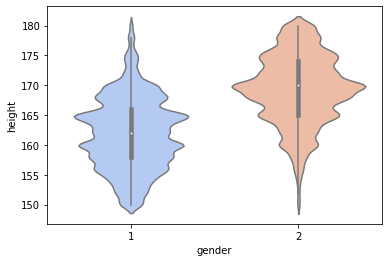

In [31]:
# add your explanation and code here
sns.violinplot(x="gender", y="height", data=filtered_df,palette='coolwarm')

In [54]:
df_melt = pd.melt(frame = filtered_df, value_vars = ['height'],id_vars=['gender'])
df_melt.head()

,gender,variable,value
0,2,height,168
1,1,height,156
2,1,height,165
3,2,height,169
4,1,height,156


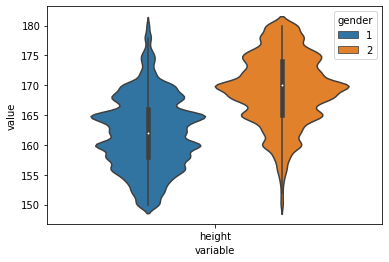

In [55]:
sns.violinplot(x='variable',y='value',data=df_melt, hue = 'gender')

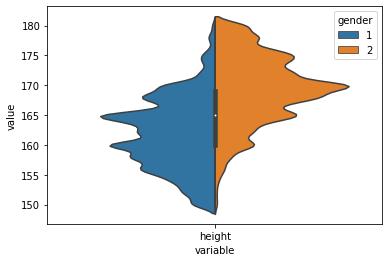

In [56]:
sns.violinplot(x='variable',y='value',data=df_melt, hue = 'gender', split = True)
#split puts the plots together 

### Question 2: Calculate and plot a correlation matrix using the Spearman's rank correlation coefficient. Which pair of features has the strongest Spearman correlation?


1. Height, Weight
2. Age, Weight
3. Cholesterol, Gluc
4. Cardio, Cholesterol
5. Ap_hi, Ap_lo
6. Smoke, Alco

In [63]:
corr_df = filtered_df[['age','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco']].corr('pearson')
corr_df

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco
age,1.000000,-0.076932,0.070168,0.018689,0.153508,0.154642,0.097646,-0.044371,-0.026970
height,-0.076932,1.000000,0.251503,0.004586,0.017922,-0.065980,-0.028364,0.187830,0.089785
weight,0.070168,0.251503,1.000000,0.027030,0.227922,0.137705,0.094133,0.056533,0.059917
ap_hi,0.018689,0.004586,0.027030,1.000000,0.072803,0.021499,0.010226,-0.001928,0.000769
ap_lo,0.153508,0.017922,0.227922,0.072803,1.000000,0.154348,0.067048,0.023275,0.033042
cholesterol,0.154642,-0.065980,0.137705,0.021499,0.154348,1.000000,0.451388,0.005696,0.031050
gluc,0.097646,-0.028364,0.094133,0.010226,0.067048,0.451388,1.000000,-0.010225,0.005805
smoke,-0.044371,0.187830,0.056533,-0.001928,0.023275,0.005696,-0.010225,1.000000,0.341200
alco,-0.026970,0.089785,0.059917,0.000769,0.033042,0.031050,0.005805,0.341200,1.000000


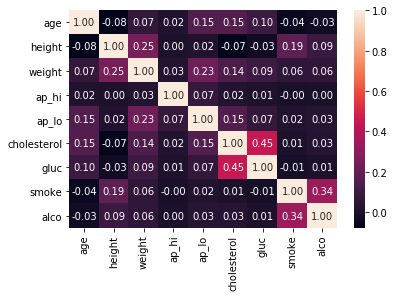

In [64]:
sns.heatmap(corr_df, annot = True, fmt = '.2f')
#fmt = 2 values after the decimal 
#

In [66]:
mask = np.zeros_like(corr_df,dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

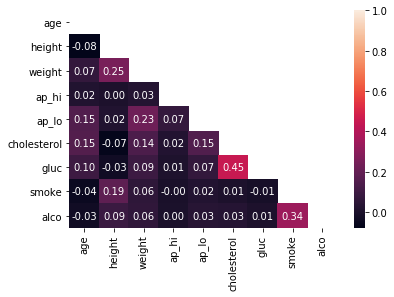

In [67]:
sns.heatmap(corr_df,annot = True, fmt = '.2f',mask=mask)

### Question 3: Create a *count plot* using [`countplot()`](http://seaborn.pydata.org/generated/seaborn.countplot.html) with the age on the *X* axis and the number of people on the *Y* axis. 

Your resulting plot should have two columns for each age, corresponding to the number of people for each *cardio* class of that age(You calculated the age of the respondents in years earlier).

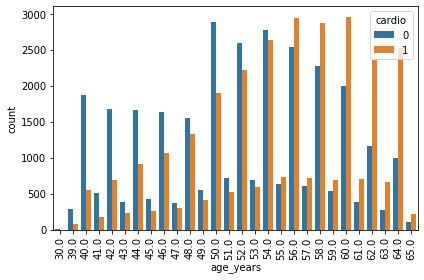

In [73]:
# add your explanation and code here
count_p = sns.countplot(x = "age_years", hue = 'cardio', data = filtered_df)
plt.xticks(rotation = 90)
plt.tight_layout()